In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

#### Algorithm

In [2]:
def transform_to_polynomial_feature(x: np.ndarray, n: int) -> np.ndarray:
    return np.vander(x, n+1, increasing=True)[:, 1:]

In [3]:
import sys
from typing import Tuple, List

def initialize_coefficients(n: int = 2) -> np.ndarray:
    epsilon = sys.float_info.epsilon
    return np.random.uniform(epsilon, 1 - epsilon, n + 1)


def calculate_regression_function(X: np.ndarray, betas: np.ndarray) -> np.ndarray:
    return betas[0] + X.dot(betas[1:])


def calculate_error(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> float:
    diff = calculate_regression_function(X, betas) - y
    return np.dot(diff, diff) / (2 * len(y))


def calculate_gradient(X: np.ndarray, y: np.ndarray, betas: np.ndarray) -> np.ndarray:
    n = len(y)
    y_pred = calculate_regression_function(X, betas)
    gradient = np.zeros_like(betas)
    gradient[0] = (1 / n) * np.sum(y_pred - y)
    gradient[1:] = (1 / n) * X.T.dot(y_pred - y)
    return gradient


def update_regression_coefficients(X: np.ndarray, y: np.ndarray, betas: np.ndarray, alpha: float) -> np.ndarray:
    gradient = calculate_gradient(X, y, betas)
    return betas - alpha * gradient


EPOCHS = 2000

def learn_and_fit(X: np.ndarray, y: np.ndarray, n: int, alpha: float) -> Tuple[np.ndarray, np.ndarray]:
    X = transform_to_polynomial_feature(X, n)

    betas, error = np.empty((EPOCHS, X.shape[1] + 1)), np.empty(EPOCHS)
    betas_arr = initialize_coefficients(X.shape[1])
    
    for epoch in range(EPOCHS):
        betas_arr = update_regression_coefficients(X, y, betas_arr, alpha)
        betas[epoch, :] = betas_arr
        error[epoch] = calculate_error(X, y, betas_arr)
        
    return betas, error

#### Execution

Znalezione wartości współczynników dla wielomianu stopnia 2: [32.22506456 46.4040677  -6.25207764]
Znalezione wartości współczynników dla wielomianu stopnia 3: [18.04319912 18.70405842 15.09511905 -3.20863031]
Znalezione wartości współczynników dla wielomianu stopnia 4: [ 2.13732625  2.63730318  4.3707645   6.03559401 -1.28123516]


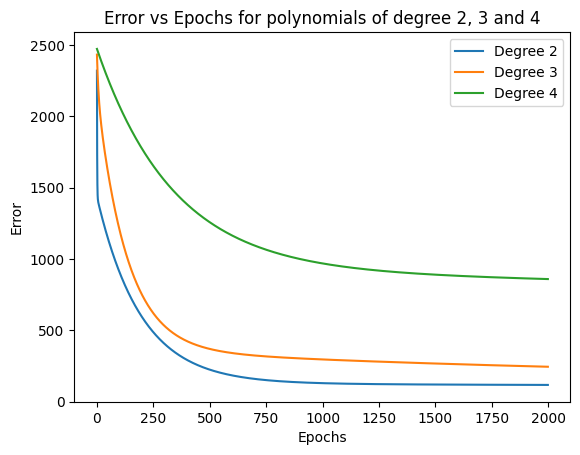

In [4]:
df = pd.read_csv('jaws.csv')
X = df['age'].values / 10.0
y = df['bone'].values

# Dla wielomianu stopnia 2
betas, error = learn_and_fit(X, y, 2, 0.003)
print('Znalezione wartości współczynników dla wielomianu stopnia 2:', betas[-1])
plt.plot(error, label='Degree 2')

# Dla wielomianu stopnia 3
betas, error = learn_and_fit(X, y, 3, 0.00075)
print('Znalezione wartości współczynników dla wielomianu stopnia 3:', betas[-1])
plt.plot(error, label='Degree 3')

# Dla wielomianu stopnia 4
betas, error = learn_and_fit(X, y, 4, 0.00003)
print('Znalezione wartości współczynników dla wielomianu stopnia 4:', betas[-1])
plt.plot(error, label='Degree 4')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs for polynomials of degree 2, 3 and 4')
plt.show()

#### Influence of normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

polynomial_degree = 3
alpha = 0.00075

print("Przed normalizacją:")
%timeit learn_and_fit(X, y, polynomial_degree, alpha)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).ravel()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

print("Po normalizacji:")
%timeit learn_and_fit(X_scaled, y_scaled, polynomial_degree, alpha)

Przed normalizacją:
25.6 ms ± 275 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Po normalizacji:
26.5 ms ± 334 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Degrees comparison

In [6]:
df = pd.read_csv('jaws.csv')
X = df['age'].values / 10.0
y = df['bone'].values

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).ravel()
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

Znalezione wartości współczynników dla wielomianu stopnia 1: [ 2.13732625  2.63730318  4.3707645   6.03559401 -1.28123516]
Znalezione wartości współczynników dla wielomianu stopnia 4: [ 2.13732625  2.63730318  4.3707645   6.03559401 -1.28123516]
Znalezione wartości współczynników dla wielomianu stopnia 5: [ 2.13732625  2.63730318  4.3707645   6.03559401 -1.28123516]


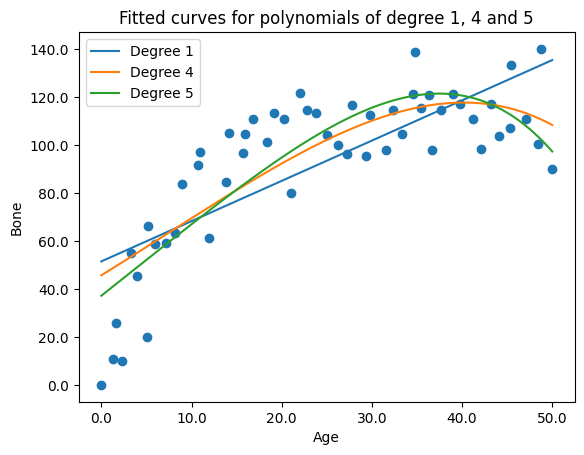

In [7]:
# Dla wielomianu stopnia 1
betas_deg1, _ = learn_and_fit(X_scaled, y_scaled, 1, 0.01)
print('Znalezione wartości współczynników dla wielomianu stopnia 1:', betas[-1])

# Dla wielomianu stopnia 4
betas_deg4, _ = learn_and_fit(X_scaled, y_scaled, 4, 0.05)
print('Znalezione wartości współczynników dla wielomianu stopnia 4:', betas[-1])

# Dla wielomianu stopnia 5
betas_deg5, _ = learn_and_fit(X_scaled, y_scaled, 5, 0.1)
print('Znalezione wartości współczynników dla wielomianu stopnia 5:', betas[-1])

X *= 10.0

plt.scatter(X_scaled, y_scaled)

x = np.linspace(min(X_scaled), max(X_scaled), 100)

plt.plot(x, np.polyval(betas_deg1[-1][::-1], x), label='Degree 1')
plt.plot(x, np.polyval(betas_deg4[-1][::-1], x), label='Degree 4')
plt.plot(x, np.polyval(betas_deg5[-1][::-1], x), label='Degree 5')

labels = np.arange(min(X), max(X), 10)
plt.xticks(ticks=np.linspace(0, 1, len(labels)), labels=labels)
labels = np.arange(min(y), max(y), 20)
plt.yticks(ticks=np.linspace(0, 1, len(labels)), labels=labels)
plt.xlabel('Age')
plt.ylabel('Bone')
plt.title('Fitted curves for polynomials of degree 1, 4 and 5')
plt.legend()
plt.show()

#### Another dataset

In [8]:
# Yield Data Set ze strony https://online.stat.psu.edu/stat501/lesson/9/9.8
X = np.array([50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100])
y = np.array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0])

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X.reshape(-1, 1)).ravel()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

Znalezione wartości współczynników dla wielomianu stopnia 1: [0.31926016 0.35434614]
Znalezione wartości współczynników dla wielomianu stopnia 3: [ 0.54359745 -0.72074582  0.12441584  0.91905334]
Znalezione wartości współczynników dla wielomianu stopnia 5: [ 0.5716655  -0.94119983  0.58351786  0.37458194  0.37229009 -0.08375153]


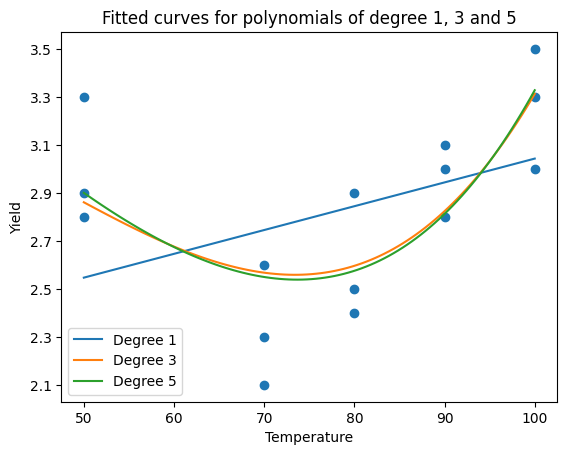

In [9]:
# Dla wielomianu stopnia 1
betas_deg1, _ = learn_and_fit(X_scaled, y_scaled, 1, 0.01)
print('Znalezione wartości współczynników dla wielomianu stopnia 1:', betas_deg1[-1])

# Dla wielomianu stopnia 3
betas_deg3, _ = learn_and_fit(X_scaled, y_scaled, 3, 0.05)
print('Znalezione wartości współczynników dla wielomianu stopnia 3:', betas_deg3[-1])

# Dla wielomianu stopnia 5
betas_deg5, _ = learn_and_fit(X_scaled, y_scaled, 5, 0.1)
print('Znalezione wartości współczynników dla wielomianu stopnia 5:', betas_deg5[-1])

plt.scatter(X_scaled, y_scaled)

x = np.linspace(min(X_scaled), max(X_scaled), 100)

plt.plot(x, np.polyval(betas_deg1[-1][::-1], x), label='Degree 1')
plt.plot(x, np.polyval(betas_deg3[-1][::-1], x), label='Degree 3')
plt.plot(x, np.polyval(betas_deg5[-1][::-1], x), label='Degree 5')

plt.legend()

labels = np.arange(min(X), max(X) + 10, 10)
plt.xticks(ticks=np.linspace(0, 1, len(labels)), labels=labels)
labels = np.around(np.arange(min(y), max(y) + 0.2, 0.2), decimals = 1)
plt.yticks(ticks=np.linspace(0, 1, len(labels)), labels=labels)
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Fitted curves for polynomials of degree 1, 3 and 5')
plt.legend()
plt.show()